# Deep Learning with Pytorch

In this homework, we will learn more about Deep Learning, which Stanford CS professor Andrew Ng deemed to be the 'new electricity'. Deep learning has been used to solve a multitude of problems in various fields such as computer vision and natural language processing.

There are many cool frameworks for building deep learning models - PyTorch, Tensorflow, Theano, MxNet, and more! Almost all of these frameworks have multi-gpu support built-in. In this assignment, we will be building neural networks in PyTorch to solve an interesting classification problem.



![alt text](http://4.bp.blogspot.com/-sLgBLS3bJO8/U__Kx6PnkRI/AAAAAAAAAWM/Gz3cL5jiwTo/s320/godeeper.jpg)





## Why deep learning?


*   It's coooool
*   Everyone is talking about deep learning these days! People like Siraj Raval can teach it in 5 mins (Check out his youtube channel for some comedy)
*    Deep learning unlocks the treasure trove of unstructured big data for those with the imagination to use it
*   Deep learning models have great representational power and are 'universal approximators'


### Deep Learning Applications:


Deep learning has been significantly improved voice command systems (such as Siri and Alexa), as well as healthcare and image identification.

Deep learning has applications across numerous industries, which is why experts consider deep learning to be the future of almost everything.

**Examples of deep learning:**

Neural network detecting anomalies in Chest Xrays :




![alt text](https://imgur.com/HKPzrzP.jpg)

Most humans can't tell that this is a case of Pleural Effusion (sounds like medical jargon to engineers like us) but this Neural Network model can detect it very well!

Mask RCNNs in action for detecting objects on the road aiding a self driving vehicle's driving:
![alt text](https://miro.medium.com/max/3864/1*O4wsvh0CHWjP6IrK9HI_Zg.png)

Pretty cool, right? We will be appling CNNs to solve a cool image classification problem.


Run the following cells to set up the notebook.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from collections import Counter
from PIL import Image
from skimage import io, transform
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive

## Set up GPU capabilities

The cell below sets up a CUDA device to use with torch, if available to you.

**Remeber to turn on the GPU for runtime in Colab**
*   Go to Runtime -> Change runtime type --> GPU


Note that you can create a PyTorch tensor `T` that resides on the GPU using the command `T = torch.Tensor(..., device=cuda)`.
You can also copy existing tensors to the GPU with the command `T = T.to(device)` (make sure to overwrite `T` with the result of this function call). If you do not have a GPU, these commands will still work.

In [5]:
# DO NOT MODIFY
torch.manual_seed(42) # For grading consistency
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.0.1+cu118
cuda:0


# **Part 1:** Data Preprocessing and Preparation for Modeling in `PyTorch`

In this homework we will tackle the problem of classifying images.

Specifically, we would be looking at the CIFAR-10 dataset.

![Screen Shot 2565-11-20 at 15.41.04.png](https://s2.loli.net/2022/11/21/cseQkbxzPS7GmTE.png)

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

There are 50000 training images and 10000 test images.

We would be using this dataset to train 3 different models:

1.   Logistic Regression
2.   Fully Connected Neural Network
3.   Convolutional Neural Network

And analyze the difference between these models by looking at the test accuracy.



## 1.1 Pytorch Dataset and DataLoader

To keep data loading consistent across different models, PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data.

`Dataset` stores the samples and their corresponding labels. And `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

While Pytorch provides Dataset and Dataloader for some popular datasets (such as Titanic), often of the time we need to define our own Custom Dataset to process our dataset.

![Screen Shot 2565-11-20 at 15.59.54.png](https://s2.loli.net/2022/11/21/7tGzmxKIvsOk8S5.png)

Dataset Class is defined with 3 compoenents:

1.   __init__
2.   __len__ so that len(dataset) returns the size of the dataset.
3.   __getitem__ to support the indexing such that `dataset[i]` can be used to get `i`ith sample (in our case Image, label pair).

To create a Custom Dataset, you would need overide above functions.

Documentation for creating custom dataset can be found [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

In this assignment, we would be using a **predefined Dataset from Pytorch**. (Since CIFAR-10 is a classic image dataset).

Complete the missing code in the two sections below.

*   1.1.1 Instantiate Train and Test Dataset.
*   1.1.2 Instantiate Train and Test Dataloader.


### 1.1.1 Instantiate Dataset (for train/test dataset)

One optional function in Dataset class is `transform`, where we can apply a transformation to the dataset before we load them as a dataloader. For example if we define a `Resize` function in transform, all of our dataset(images) would be resized.

Below, complete the code to apply following transformations (in order!!):

1.   Resize the image to 32 by 32 (given as scale variable)
2.   Convert the Images to Tensor
3.   Normalize the Tensor using, the means `[0.485, 0.456, 0.406]` and standard deviations `[0.229, 0.224, 0.225]`

Please compose this sequence of transformations using `transforms.Compose`, and save the result of this transformation sequence with the variable name `transform`. We highly recommend reading the [PyTorch documentation](https://pytorch.org/vision/stable/transforms.html) for this function before proceeding.

You might be asking, why we are using these two lists `[0.485, 0.456, 0.406]` and `[0.229, 0.224, 0.225]` to normalize the tensor? These two lists are the mean and the standard deviation of each dimension in the [ImageNet](https://www.image-net.org/index.php) dataset respectively. ImageNet has a total of 14,197,122 Images, and Pytorch often uses these values to normalize image data.

In [6]:
scale = 32
# TODO
transform = transforms.Compose([
    transforms.Resize((scale, scale)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
transform
# TODO END

Compose(
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

Now that we have defined the tranforms we are going to apply to the dataset, let's instantiate both `trainDataset` and `testDataset` using our predefined PyTorch Dataset. Please refer to the documentation [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10).


In [7]:
# TODO
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
train_dataset, test_dataset
# TODO END

100%|██████████| 170498071/170498071 [00:02<00:00, 75853431.49it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

### 1.1.2 Dataloader - Train / Test

Now that we have `trainDataset` and `testDataset`, let's create dataloaders using these two datasets.

You can load the dataset into dataloaders using the `DataLoaders` object. Please refer to the documentation [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Please save the respective dataloaders for `trainDataset` and `testDataset` as `train_loader` and `test_loader` respectively.

For both `train_loader` and `test_loader`, set the `batch_size` equal to the previously-defined variable `batch`, set `shuffle` to `True`, and `num_workers` as 0.

In [9]:
batch = 64
# TODO
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=True)
# TODO END

In [10]:
# TODO
str_train_loader = "DataLoader(train_dataset, batch_size = batch, shuffle = True, num_workers = 0)"
str_test_loader = "DataLoader(test_dataset, batch_size = batch, shuffle = True, num_workers = 0)"
# END TODO

## 1.2 Summarizing our Dataset

When implementing ML applications, getting a good sense of the dataset we are working on is always the first step you should take.

### 1.2.1 Looking at the distribution of labels

1. Get the number of labels in training dataset and save this quantity as the variable `train_num_labels`.

2. Create a dictionary `train_dataset_dict` that contains the labels as keys and the number of images inside the label as values.

3. Create a `DataLoader` called `train_loader_bar_plot` which takes as arguments the `train_dataset`, with the `batch_size` equal to the length of the `train_dataset`.

Moreover, please repeat the above 3 steps for the test dataset. Please call the variables for each step `test_num_labels`, `test_num_labels` and `test_loader_bar_plot` respectively.

In [12]:
# TODO - TRAIN
train_num_labels = len(train_dataset.classes)
# Creating dictionary for train dataset
train_dataset_dict = {}
for _, v in train_dataset:
    if (v not in train_dataset_dict):
        train_dataset_dict[v] = 0
    train_dataset_dict[v] += 1
train_dataset_dict
# END TODO

{6: 5000,
 9: 5000,
 4: 5000,
 1: 5000,
 2: 5000,
 7: 5000,
 8: 5000,
 3: 5000,
 5: 5000,
 0: 5000}

In [13]:
# TODO - TEST
test_num_labels = len(test_dataset.classes)

# Creating dictionary for train dataset
test_dataset_dict = {}
for _, v in test_dataset:
    if (v not in test_dataset_dict):
        test_dataset_dict[v] = 0
    test_dataset_dict[v] += 1
test_dataset_dict
# END TODO

{3: 1000,
 8: 1000,
 0: 1000,
 6: 1000,
 1: 1000,
 9: 1000,
 5: 1000,
 7: 1000,
 4: 1000,
 2: 1000}

# **Part 2:** Classification Models

We now have the data needed to train a multi-class object classifier. We will start simple with a logistic regression classifier as a baseline for our performance, before we move onto more complex neural networks.

## 2.1 Logical Logistic Regression - Baseline

Let's first try solving this problem with a Logistic Regression classifier.

We will define a logistic regression model in Pytorch and train it on our training set and evaluate the performance on the test set.

### 2.1.1 Logistic Regression Model Architecture

We will define our first model in Pytorch. Read up about how to define and use layers in a Pytorch neural network [here](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

Our first model is a logistic regression model with the number of outputs equal to the number of classes in the model. Please implement the constructor for the `LogReg` class (the `__init__` function below) with the definition of the logistic regression model.

Please review how to call the function `nn.Flatten()` when defining the model.

When implementing this section, please think about what activation function would be most appropriate for logistic regression.

In [18]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, 10),
            nn.Sigmoid()
        )
        # END TODO

    def forward(self, x):
        # TODO
        outputs = self.layer(x)
        # END TODO
        return outputs

Also, let's print the model summary out by running the cell below:

In [19]:
LogReg()

LogReg(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): Sigmoid()
  )
)

### 2.1.2 Training Logistic Regression Model

TODOs
1.   Instantiate the Logistic regression to the variable `logreg`. Make sure to send this to the GPU device.

2.   Set the loss criterion as `CrossEntropyLoss` (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions)). Note that softmax is already built into CrossEntropyLoss so if you use CrossEntropyLoss as the loss criterion, you don't need to add an additional softmax layer.

3.   Fill in the missing parts in the training loop (see `#TODO` comments below)
4.   Save the Training Accuracy for every epoch into the variable `acc_LIST_log`.
5.   Save the Average Loss for every epoch into the variable `loss_LIST_log`.

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [21]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
logreg = LogReg().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(logreg.parameters(), lr=1e-4) #lr - learning step
epoch = 25

loss_LIST_log = []
acc_LIST_log = []

# Train the Logistic Regression
for epoch in range(epoch):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        inputs, labels = inputs.to(device), labels.to(device)

        # TODO: Complete the body of this for-loop
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Calculate the forward pass
        outputs = logreg(inputs)
        _, predicted = torch.max(outputs, 1)

        # Calculate the gradient and update the model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update
        running_loss += loss.item()
        correct += (predicted == labels).sum()
        total += labels.size(0)

    accuracy = correct / total * 100
    acc_LIST_log.append(accuracy)
    loss_LIST_log.append(running_loss / len(train_loader)) # get the avg loss for each epoch
    # END TODO

    # print statistics
    print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 2.0916117033385255, Accuracy = 32.305999755859375
The loss for Epoch 1 is: 2.044986519209869, Accuracy = 35.79999923706055
The loss for Epoch 2 is: 2.030918131856357, Accuracy = 36.577999114990234
The loss for Epoch 3 is: 2.0219341155208284, Accuracy = 37.13999938964844
The loss for Epoch 4 is: 2.0153099678056625, Accuracy = 37.4739990234375
The loss for Epoch 5 is: 2.010246751710887, Accuracy = 37.83199691772461
The loss for Epoch 6 is: 2.0058474623028886, Accuracy = 38.205997467041016
The loss for Epoch 7 is: 2.0019963097084514, Accuracy = 38.32599639892578
The loss for Epoch 8 is: 1.9985134961355069, Accuracy = 38.57599639892578
The loss for Epoch 9 is: 1.9957958011675978, Accuracy = 38.902000427246094
The loss for Epoch 10 is: 1.9929037339547102, Accuracy = 38.970001220703125
The loss for Epoch 11 is: 1.9905049945692272, Accuracy = 39.23999786376953
The loss for Epoch 12 is: 1.987772925582993, Accuracy = 39.242000579833984
The loss for Epoch 13 is: 1.986013

### 2.1.3 Logistic Regression Model Accuracy and Loss

Calculate the Test Accuracy for the Logistic Regression Model we trained above.

This should be similar to how we calculated training accuracy above.

In [23]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO: complete the body of this for-loop
        outputs = logreg(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
        # TODO END

test_acc_log = correct / total * 100
print('Test Accuracy: ' + str(test_acc_log))

Test Accuracy: tensor(39.0200, device='cuda:0')


## 2.2 Feedforward Neural Networks

![Screen Shot 2565-11-20 at 16.03.22.png](https://s2.loli.net/2022/11/21/dvqstVUzcQPChD1.png)


Since logistic regression isn't that great at the classification problem above, we need more representation power in our model. We will now define a feedforward neural network.

Complete the *FNN* class below to define a feedforward neural network with at least 2 hidden layers. Note that the last layer must have the same number of classes as the output size!

When implementing this model, please think about what activation function would be most appropriate for each layer in this classifier.

### 2.2.1 Feedforward Neural Network Model Architecture

In [25]:
class FNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Sigmoid()
        )
        # END TODO

    def forward(self, x):
        # TODO
        outputs = self.layer(x)
        # END TODO
        return outputs

Let's print the model summary

In [26]:
FNN()

FNN(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
    (6): Sigmoid()
  )
)

### 2.2.2 Training FNN Model

TODOs
1.   Instantiate the FNN to the variable `fnn` (make sure to send this to the device env)
2.   Set the loss criterion to be `CrossEntropyLoss` (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions))
3.   Fill in the missing parts in the training loop below.
4.   Save the Training Accuracy for every epoch into `acc_LIST_FNN`
5.   Save the Average Loss for every epoch into `loss_LIST_FNN`

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [28]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
fnn = FNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(fnn.parameters(), lr=1e-4) #lr - learning step
epoch = 25

acc_LIST_FNN = []
loss_LIST_FNN = []

# Train the FNN
for epoch in range(epoch):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        labels = labels.type(torch.LongTensor) # Cast to Long
        inputs, labels = inputs.to(device), labels.to(device)

        # TODO
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Calculate the forward pass
        outputs = fnn(inputs)
        _, predicted = torch.max(outputs, 1)

        # Calculate the gradient and update the model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update
        running_loss += loss.item()
        correct += (predicted == labels).sum()
        total += labels.size(0)

    accuracy = correct / total * 100 # Calculate Training Acc
    acc_LIST_FNN.append(accuracy)
    loss_LIST_FNN.append(running_loss / len(train_loader)) # get the avg loss for each epoch

    # END TODO

    # print statistics
    print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 2.002084683731694, Accuracy = 37.24800109863281
The loss for Epoch 1 is: 1.9207782498406023, Accuracy = 43.26599884033203
The loss for Epoch 2 is: 1.8903477371806074, Accuracy = 46.20800018310547
The loss for Epoch 3 is: 1.8685586232968303, Accuracy = 48.25199890136719
The loss for Epoch 4 is: 1.8509861156153862, Accuracy = 50.02799606323242
The loss for Epoch 5 is: 1.8351154780143972, Accuracy = 51.01599884033203
The loss for Epoch 6 is: 1.8212180158976095, Accuracy = 52.56999588012695
The loss for Epoch 7 is: 1.8097881174758268, Accuracy = 53.380001068115234
The loss for Epoch 8 is: 1.7980097532272339, Accuracy = 54.512001037597656
The loss for Epoch 9 is: 1.7877293503497873, Accuracy = 55.52799606323242
The loss for Epoch 10 is: 1.7782755724304473, Accuracy = 56.38999938964844
The loss for Epoch 11 is: 1.7681196931073122, Accuracy = 57.1879997253418
The loss for Epoch 12 is: 1.7587891007628282, Accuracy = 58.27799987792969
The loss for Epoch 13 is: 1.7504481

### 2.2.3 FNN Model Accuracy and Loss

Calculate the Test Accuracy for the FNN Model we trained above (the technique for doing this is the same as computing the test accuracy for the logistic regression classifier above).

In [30]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO: complete each iteration of the for-loop
        outputs = fnn(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)

test_acc_FNN = correct / total * 100
# TODO END
print('Test Accuracy: ' + str(test_acc_FNN))

Test Accuracy: tensor(52.8400, device='cuda:0')


## 2.3 Convoluted Convolutional Neural Networks

So, what are CNNs?

Convolutional Neural Networks are very similar to Feedforward Neural Networks from the previous section: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

If you wanna know more about how CNNs function and see some cool visualizations, we would highly recommend [this](https://cs231n.github.io/convolutional-networks/) page

![Screen Shot 2565-11-20 at 16.01.53.png](https://s2.loli.net/2022/11/21/L6pUz2chXWRGn31.png)

We will define the architecture for the CNN we will be using. The components of a CNNs are as follows:

*   Convolutional Layers
*   Pooling Layers
*   Linear Layers
*   Activation Functions

Define a CNN model with Pytorch that contains one or more layers, where each layer consists of a convolutional layer followed by an activation function and a max pool. (For this assignment, we discourage adding three or more layers.)

Then, flatten the output from the convolutional layers, and pass it through one or more fully connected or 'dense' layers and activation functions after all but the last layer. Note that the output shape from the last layer must be the same as the number of classes.

### 2.3.1 Convolutional Neural Network Model Architecture

In [32]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: complete the constructor of the CNN class
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(8192, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        # END TODO

    def forward(self, x):
        # TODO: Implement the forward() method of the CNN class
        outputs = self.layer(x)
        # END TODO
        return outputs

Let's print out the model summary

In [33]:
CNN()

CNN(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=8192, out_features=512, bias=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
  )
)

### 2.3.2 Training CNN Model

TODOs
1.   Instantiate the CNN to the variable `cnn` (make sure to send this to the device env)
2.   Set the criterion as a CrossEntropyLoss (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions))
3.   Fill in the missing parts in the training loop.
4.   Save the Training Accuracy for every epoch into `acc_LIST_CNN`
5.   Save the Average Loss for every epoch into `loss_LIST_CNN`

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [35]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
epoch = 25

acc_LIST_CNN = []
loss_LIST_CNN = []

# Train the CNN
for epoch in range(epoch):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        inputs, labels = inputs.to(device), labels.to(device)
        # TODO: complete the body of this for-loop
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Calculate the forward pass
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs, 1)

        # Calculate the gradient and update the model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update
        running_loss += loss.item()
        correct += (predicted == labels).sum()
        total += labels.size(0)

    accuracy = correct / total * 100 # Calculate Trining Acc
    acc_LIST_CNN.append(accuracy)
    loss_LIST_CNN.append(running_loss / len(train_loader)) # get the avg loss for each epoch

    # END TODO
    # print statistics
    print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 1.5198093270859145, Accuracy = 45.641998291015625
The loss for Epoch 1 is: 1.1960012626160137, Accuracy = 57.81999969482422
The loss for Epoch 2 is: 1.0516229037509854, Accuracy = 63.003997802734375
The loss for Epoch 3 is: 0.9511012884661975, Accuracy = 66.85599517822266
The loss for Epoch 4 is: 0.8730533574243335, Accuracy = 69.67799377441406
The loss for Epoch 5 is: 0.7984148616071247, Accuracy = 72.2719955444336
The loss for Epoch 6 is: 0.734830214696772, Accuracy = 74.54199981689453
The loss for Epoch 7 is: 0.6723397587952407, Accuracy = 76.87000274658203
The loss for Epoch 8 is: 0.6177659290449699, Accuracy = 78.54999542236328
The loss for Epoch 9 is: 0.5569063670113873, Accuracy = 80.843994140625
The loss for Epoch 10 is: 0.5025632379152586, Accuracy = 82.76000213623047
The loss for Epoch 11 is: 0.44335015171476644, Accuracy = 85.01399993896484
The loss for Epoch 12 is: 0.3871036106363282, Accuracy = 87.0780029296875
The loss for Epoch 13 is: 0.334795658

### 2.3.3 CNN Model Accuracy and Loss

Calculate the Test Accuracy for the CNN Model we trained above. The technique for doing this is the same as computing the test accuracy for the logistic regression and FFN classifiers above.

In [37]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO
        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)

test_acc_CNN = correct / total * 100
# END TODO
print(f'Test Accuracy: ' + str(test_acc_CNN.item()))

Test Accuracy: 73.5999984741211


**From the test accuracies we can confirm that CNN works better than Logistic and FNN**

**This is due to the intrinsic structure of CNN, where it captures the semantic of the image**.

## 2.4 Confusion Matrix

We want to give you some insight into how you can further analyze the performance of the classification model you have trained.

Upto now we have only used accuracy as a measure of performance. Although accuracy is simple and widely used measure, there are drawbacks to using accuracy.

Assume that we are trying to train a model to detect a rare disease from CT images of patients. For simplicity, assume that this rare disease has an incidence rate of 1%.

In this situation, if we train a degenerative model which always predicts that the patient does not have the disease, the accuracy is very high, namely 99%! Obviously in this case, accuracy is not a good measure of performance of the model.

This example serves to motivate confusion matrices and related metrics.

A confusion matrix is defined to be $C \times C$ 2D matrix, where $C$ is number of distinct labels in the dataset. In this matrix, the rows represent the actual labels and the columns represent the predicted labels.

The $(i, j)$-th entry of the confusion matrix contains the no. of data points where the actual label is $i$ but the model predicted $j$.

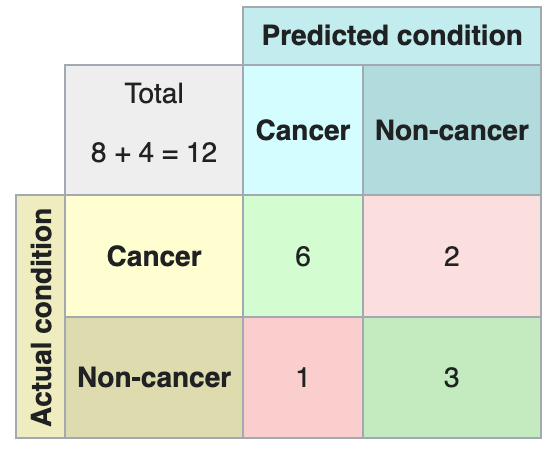

The provided image is an example of a confusion matrix for binary classification (C = 2), but you can easily imagine this scaling up to C > 2.

From this confusion matrix we can get all sorts of useful metrics such as False Positive Rate (FPR), False Negative Rate (FNR), Recall, Precision, etc... If you are interested in learning more about confusion matrix and related metrics [this wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix#cite_note-11) is a good place to look at.







### 2.4.1 Create a confusion matrix

For the test dataset using the CNN model you have trained above, create a confusion matrix. Please save the confusion matrix as a pandas dataframe called `confusion_matrix_df`.

In [60]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
# TODO
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO
        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.to('cpu'))
        y_pred.extend(predicted.to('cpu'))
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred))
# END TODO
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,790,10,42,21,19,9,15,6,58,30
1,30,804,8,8,2,6,13,1,49,79
2,71,1,586,62,93,64,73,27,15,8
3,20,7,60,584,77,128,70,23,21,10
4,24,3,52,63,715,33,54,40,12,4
5,23,1,29,178,62,632,29,31,13,2
6,8,4,24,54,35,19,843,2,9,2
7,19,3,28,41,88,55,11,739,4,12
8,51,18,14,13,4,5,6,6,868,15
9,39,57,7,12,6,7,13,12,48,799
